## Setting Up

In [12]:
import numpy as np
import scipy
import matplotlib.style as sty
import matplotlib.pyplot as plt

%matplotlib inline

sty.use("seaborn")

from pltconfig import *

# Problem 3

Solve the equation $u^{\prime} = \lambda u$

In [26]:
class q3a(object):
    
    def __init__(self, t0=0.0, T=2.0, k=0.01, u0=1.0, lmbda=10.0):
        
        # unload variables
        self.t0 = t0
        self.T = T
        self.k = k
        self.u0 = u0 # initial value of u at t0
        self.lmbda = lmbda
        
        # compute derived variables
        self.dT = T-t0
        self.N = int(self.dT/k)
        
        
        self.ts = self.t0 + np.arange(self.N+1)*self.k
        # compute solution
        self.U = self.run_euler()
        
    def run_euler(self):
        
        #initialize the Euler-scheme
        U = np.zeros(self.N+1)
        U[0] = self.u0
        
        # iterate
        for i in range(self.N):
            U[i+1] = U[i] + self.k*self.lmbda*U[i]
            
        return U
    
    def get_soln_plot(self, log_scale=True):
        
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        
        ax.plot(self.ts, np.exp(self.lmbda*self.ts), "k-", lw=3.0, label="Exact soln")
        ax.plot(self.ts, self.U, "o", lw=3.0, label="Computed soln")
        
        if log_scale:
            ax.set_yscale("log")
            
        ax.legend(loc=0, prop={"size":18})
        ax.tick_params(labelsize=18)
        ax.set_ylabel(r"$U[t]$", fontsize=28)
        ax.set_xlabel(r"$t$", fontsize=28)
        
        fig.tight_layout()
        fig.savefig("q3a_figure.pdf")

In [27]:
sample=q3a()

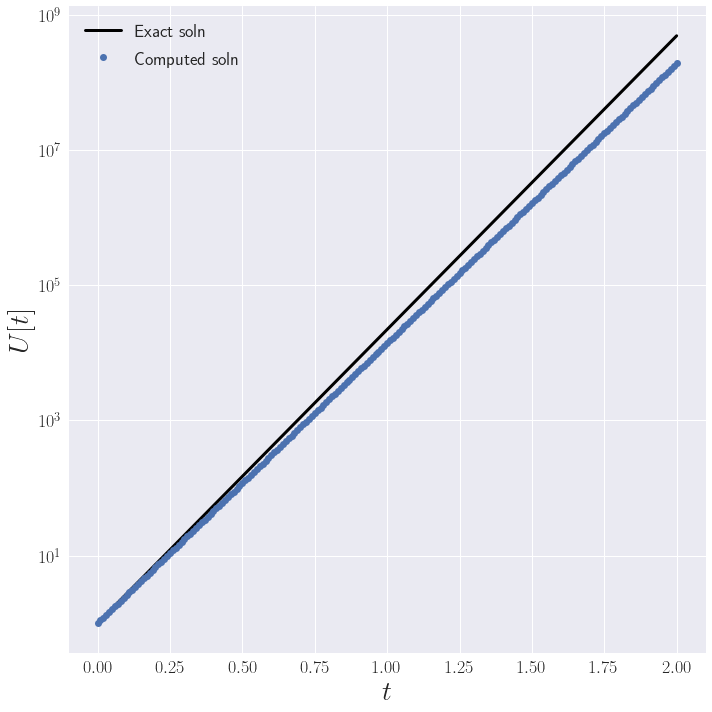

In [28]:
sample.get_soln_plot()

## Part C